--- 画像をアップロードしてください ---


Saving img.png to img.png
オリジナルのサイズ: (308, 400)
処理後のサイズ: (308, 400) (変更なし)
画像が保存されました: img_mosaic.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- モザイク処理後のプレビュー ---


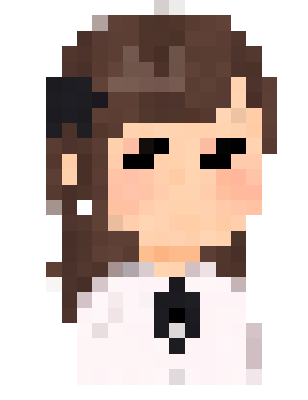

In [5]:
from google.colab import files
from PIL import Image
import io
import os

def apply_mosaic(mosaic_level=10):
    """
    画像をアップロードし、サイズを変えずにモザイク処理をかけて保存・ダウンロードする関数
    mosaic_level: モザイクの粗さ。数値が大きいほどモザイクが粗くなります。（推奨: 10〜20程度）
    """

    print("--- 画像をアップロードしてください ---")
    uploaded = files.upload()

    if not uploaded:
        print("画像がアップロードされませんでした。")
        return

    filename = list(uploaded.keys())[0]

    try:
        # 画像を開く
        img = Image.open(io.BytesIO(uploaded[filename]))
        original_size = img.size # (幅, 高さ)
        print(f"オリジナルのサイズ: {original_size}")

        # 1. 一旦小さくするサイズを計算
        # mosaic_level分の一のサイズに縮小します
        small_width = original_size[0] // mosaic_level
        small_height = original_size[1] // mosaic_level

        # 安全策: 最小でも1x1ピクセル以上にする
        small_width = max(1, small_width)
        small_height = max(1, small_height)

        # 2. 画像を縮小する（情報を間引く）
        img_small = img.resize((small_width, small_height), Image.NEAREST)

        # 3. 元のサイズに引き伸ばす
        # ここで Image.NEAREST を使うのがポイントです（補間せずドットをそのまま拡大する）
        img_mosaic = img_small.resize(original_size, Image.NEAREST)

        print(f"処理後のサイズ: {img_mosaic.size} (変更なし)")

        # 保存用のファイル名を作成
        name, ext = os.path.splitext(filename)
        output_filename = f"{name}_mosaic{ext}"

        # 保存
        img_mosaic.save(output_filename)
        print(f"画像が保存されました: {output_filename}")

        # 自動ダウンロード
        files.download(output_filename)

        # プレビュー表示
        print("--- モザイク処理後のプレビュー ---")
        display(img_mosaic)

    except Exception as e:
        print(f"エラーが発生しました: {e}")

# --- 実行部分 ---
# mosaic_level の数値を大きくすると、モザイクがより粗くなります
apply_mosaic(mosaic_level=15)